<a href="https://www.kaggle.com/code/bnvaidya/taxi-trips-bigquery?scriptVersionId=198239370" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Taxi Trip Analysis By Leveraging BigQuery


# Context:

Chicago taxi trips data provide a rich source of information for analyzing transportation patterns in the city. By leveraging Google BigQuery and Python, we can efficiently query and process large datasets to extract valuable insights. This analysis aims to investigate various aspects of taxi trips, such as the number of trips per year, trips per month for a specific year, and the average speed of trips during different times of the day.

# Objectives:

* Understand Temporal Trends: 
Analyze the number of taxi trips over the years and months to identify seasonal patterns and trends.

* Evaluate Trip Speeds:
Calculate average trip speeds by hour of the day for different time periods to understand traffic conditions and identify peak hours.

* Analyze Trip Time:
Calculate the total trip time per day to understand daily variations in trip durations.

* Handle and Clean Data:
Implement strategies to handle missing values and clean the dataset for accurate analysis.


# Steps:

Initialize BigQuery Client:
* Set up the BigQuery client to connect to the dataset.

Fetch and Analyze Data by Year:
* Define a function to fetch the number of taxi trips per year.
* Plot the results to visualize trends over the years.

Fetch and Analyze Data by Month:
* Define a function to fetch the number of taxi trips per month for a specific year.
* Plot the results to visualize seasonal variations.

Fetch and Analyze Trip Speeds:
* Define a function to calculate average trip speeds by hour of the day for different time periods.
* Plot the results to identify peak hours and traffic patterns.

Fetch and Analyze Trip Time per Day:
* Define a function to calculate the total trip time per day.
* Plot the results to visualize daily variations in trip durations.

Handle Missing Values:
* Implement a function to check for and handle missing values in the dataset.
* Clean the dataset by filling or dropping missing values as appropriate.

Visualize and Interpret Results:
* Use matplotlib for plotting and visualizing the results.
* Interpret the findings to draw meaningful conclusions about taxi trip patterns in Chicago.

In [1]:
# Import the required libraries 
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from google.cloud import bigquery

import warnings
warnings.filterwarnings("ignore")

In [2]:
# Create a "Client" object
client = bigquery.Client()

# Define the dataset
dataset_id = 'bigquery-public-data.chicago_taxi_trips'

# Get the dataset reference
dataset_ref = client.dataset(dataset_id.split('.')[-1], project=dataset_id.split('.')[0])

# API request - fetch the dataset
dataset = client.get_dataset(dataset_ref)


Using Kaggle's public dataset BigQuery integration.


In [3]:
# List all tables in the dataset
tables = list(client.list_tables(dataset_ref))

# Print the number of tables
print(f'The {dataset_id} dataset contains {len(tables)} table(s).')

# Print 
for table in tables:  
    print(table.table_id)

The bigquery-public-data.chicago_taxi_trips dataset contains 1 table(s).
taxi_trips


In [4]:
# Construct a reference to the "taxi_trips" table
table_ref = dataset_ref.table("taxi_trips")

# API request - fetch the table
table = client.get_table(table_ref)

# Preview the first five lines of the "taxi_trips" table
df = client.list_rows(table, max_results=5).to_dataframe()



In [5]:
# Print the size of the table in bytes
print(f'The size of the table {table_ref.table_id} is {table.num_bytes} bytes.')

# Print the number of rows
print(f'The number of rows in the table {table_ref.table_id} is {table.num_rows}.')

# Print the number of columns
print(f'The number of columns in the table {table_ref.table_id} is {len(table.schema)}.')

df

The size of the table taxi_trips is 82013440578 bytes.
The number of rows in the table taxi_trips is 210655468.
The number of columns in the table taxi_trips is 23.


,unique_key,taxi_id,trip_start_timestamp,trip_end_timestamp,trip_seconds,trip_miles,pickup_census_tract,dropoff_census_tract,pickup_community_area,dropoff_community_area,...,extras,trip_total,payment_type,company,pickup_latitude,pickup_longitude,pickup_location,dropoff_latitude,dropoff_longitude,dropoff_location
0,5003bdd51918a9b5a52134096663b4d7e02395c5,2130bc5fd239a4e3b304662424fb4cc7db0ca7abf78cc5...,2013-02-25 14:15:00+00:00,2013-02-25 14:15:00+00:00,120,0.00,NaN,NaN,NaN,NaN,...,NaN,NaN,Cash,None,NaN,NaN,None,NaN,NaN,None
1,720534d264001b2644f682755b294067fdf1da21,4bb55b69e710d1792f5fd4888001f4ff0ce34040f976f8...,2013-06-02 08:15:00+00:00,2013-06-02 08:15:00+00:00,60,0.02,NaN,NaN,NaN,NaN,...,NaN,NaN,Cash,None,NaN,NaN,None,NaN,NaN,None
2,515b9a6d5234a4d1fb559dca27b3e1cc541a342d,4bb55b69e710d1792f5fd4888001f4ff0ce34040f976f8...,2013-06-24 06:15:00+00:00,2013-06-24 06:15:00+00:00,60,0.04,NaN,NaN,1.0,77.0,...,NaN,NaN,Cash,None,42.009623,-87.670167,POINT (-87.67016685690001 42.0096228806),41.986712,-87.663416,POINT (-87.6634164054 41.9867117999)
3,b1142c1c2c66367edf9a8909815a171955954fb1,a945379688097db2f2e6117c99b1431b6eba73c4bcfea8...,2013-08-11 11:15:00+00:00,2013-08-11 11:30:00+00:00,960,0.43,NaN,NaN,7.0,3.0,...,NaN,NaN,Cash,None,41.922686,-87.649489,POINT (-87.6494887289 41.9226862843),41.965812,-87.655879,POINT (-87.6558787862 41.96581197)
4,7518b9acca1296c20d72791393cb00c65637ff10,0609b5525eef70a5776b43eaee8d9b065f382926ac6527...,2013-03-17 00:15:00+00:00,2013-03-17 00:15:00+00:00,0,0.00,NaN,NaN,NaN,NaN,...,0.0,0.0,Cash,None,NaN,NaN,None,NaN,NaN,None


In [6]:
def fetch_data(table_ref, client, row_limit=20000):
    """
    Fetches data from a BigQuery table and returns it as a pandas DataFrame.

    Parameters:
    - table_ref: str, the fully-qualified table ID (e.g., 'project_id.dataset_id.table_id')
    - client: bigquery.Client, the BigQuery client object
    - row_limit: int, the number of rows to fetch from the table (default: 20000)

    Returns:
    - df: pandas.DataFrame, the DataFrame containing the fetched data
    """
    # Run a query to fetch the data
    query = f"SELECT * FROM `{table_ref}` LIMIT {row_limit}"

    # Execute the query and load the data into a pandas DataFrame
    df = client.query(query).to_dataframe()

    return df

In [7]:
def check_nan_values(df):
    """
    Checks for NaN values in the DataFrame and prints the count and percentage of NaN values per column.

    Parameters:
    - df: pandas.DataFrame, the DataFrame to check for NaN values

    Returns:
    - nan_counts: pandas.Series, the count of NaN values per column
    - nan_percentage: pandas.Series, the percentage of NaN values per column
    """
    # Total count of NaN values per column
    nan_counts = df.isna().sum()

    # Percentage of NaN values per column
    nan_percentage = df.isna().mean() * 100

    # Display the results
    print("Count of NaN values per column:")
    print(nan_counts)

    return nan_counts

In [8]:
def plot_nan_values(df):
    # Visualize NaN values using a heatmap
    plt.figure(figsize=(12, 8))
    sns.heatmap(df.isna(), cbar=False, cmap='viridis')
    plt.title('Heatmap of NaN Values in DataFrame')
    plt.show()

In [9]:
# Fetch the data
df = fetch_data(table_ref, client, row_limit=20000)

# Check for NaN values in the DataFrame
nan_counts = check_nan_values(df)

Count of NaN values per column:
unique_key                    0
taxi_id                       0
trip_start_timestamp          0
trip_end_timestamp            1
trip_seconds                451
trip_miles                    0
pickup_census_tract       19823
dropoff_census_tract      19820
pickup_community_area     20000
dropoff_community_area    20000
fare                          2
tips                          2
tolls                      2864
extras                        2
trip_total                    2
payment_type                  0
company                     479
pickup_latitude           20000
pickup_longitude          20000
pickup_location           20000
dropoff_latitude          20000
dropoff_longitude         20000
dropoff_location          20000
dtype: int64


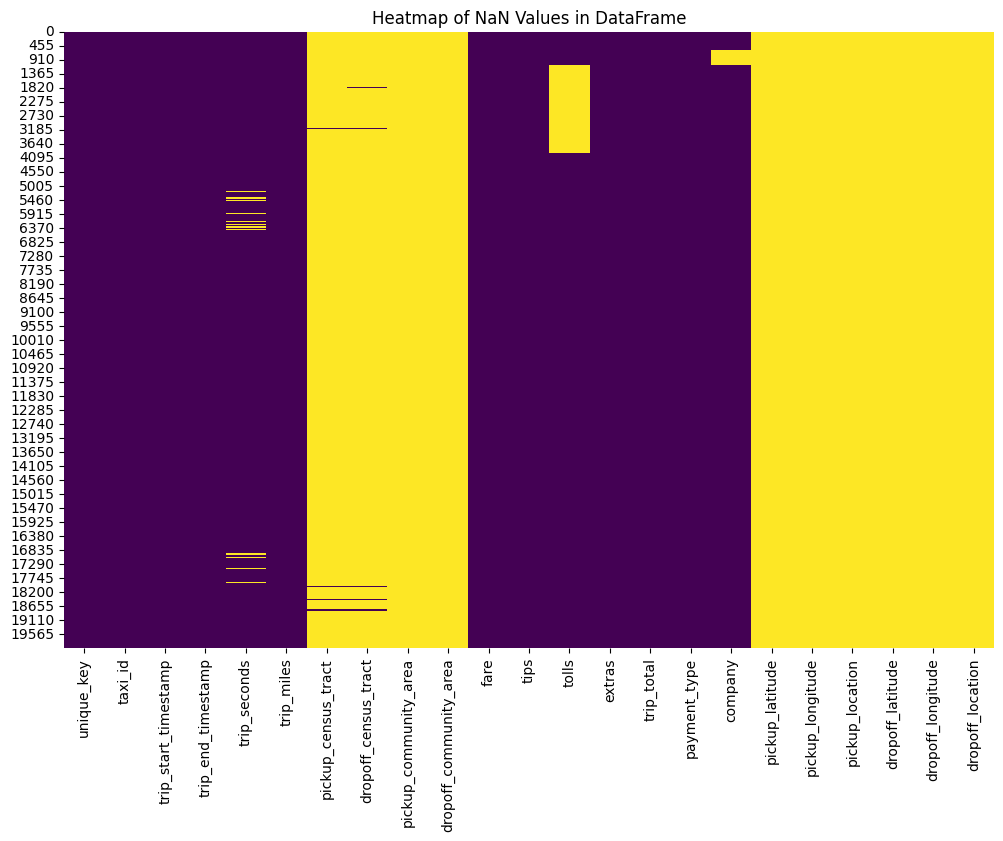

In [10]:
plot_nan_values(df)

In [11]:
# Print the columns to debug and ensure they exist
print("Available columns in the DataFrame:", df.columns.tolist())

Available columns in the DataFrame: ['unique_key', 'taxi_id', 'trip_start_timestamp', 'trip_end_timestamp', 'trip_seconds', 'trip_miles', 'pickup_census_tract', 'dropoff_census_tract', 'pickup_community_area', 'dropoff_community_area', 'fare', 'tips', 'tolls', 'extras', 'trip_total', 'payment_type', 'company', 'pickup_latitude', 'pickup_longitude', 'pickup_location', 'dropoff_latitude', 'dropoff_longitude', 'dropoff_location']


In [12]:
def handle_nan_values(df, columns_to_drop):

    # Drop columns with more than 50% NaN values
    threshold = len(df) * 0.5
    df = df.dropna(axis=1, thresh=threshold)
    
    # Print columns after dropping those with too many NaN values
    print("Columns after dropping those with >50% NaN values:", df.columns.tolist())

    # Fill NaNs in remaining numeric columns with the mean value
    numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns
    for column in numeric_columns:
        mean_value = df[column].mean()
        df[column].fillna(mean_value, inplace=True)

    # Drop remaining rows with any NaNs
    df.dropna(inplace=True)

    # Drop selected columns if they exist in the DataFrame
    columns_to_drop = [col for col in columns_to_drop if col in df.columns]
    df.drop(columns=columns_to_drop, inplace=True)

    # Print columns after dropping the specified columns
    print("Columns after dropping specified columns:", df.columns.tolist())

    return df

In [13]:
columns_to_drop=['pickup_community_area', 'dropoff_community_area', 'pickup_latitude', 'pickup_longitude', 
                     'dropoff_latitude', 'dropoff_longitude']
    
df = handle_nan_values(df, columns_to_drop)

# Print the resulting DataFrame
print("DataFrame after handling NaN values:")
print(df.head())

# Check if any NaNs remain
print("\nRemaining NaNs in DataFrame:")
print(df.isna().sum())

Columns after dropping those with >50% NaN values: ['unique_key', 'taxi_id', 'trip_start_timestamp', 'trip_end_timestamp', 'trip_seconds', 'trip_miles', 'fare', 'tips', 'tolls', 'extras', 'trip_total', 'payment_type', 'company']
Columns after dropping specified columns: ['unique_key', 'taxi_id', 'trip_start_timestamp', 'trip_end_timestamp', 'trip_seconds', 'trip_miles', 'fare', 'tips', 'tolls', 'extras', 'trip_total', 'payment_type', 'company']
DataFrame after handling NaN values:
                                 unique_key  \
0  3b3e9782ad972d7e967095f3dc665c9f84985ddf   
1  3bc3ede5a4431ccba899d6ee994be376d1760b63   
2  8e4e8caeff3b18e409cb58ce2427965c213be12e   
3  6e7c919ab667535d0925f0c57eae7a4f34ac1279   
4  3c02c19c7ed0a8cdfde5c09f215e5374e4d633fd   

                                             taxi_id  \
0  8a21e68fe864597d995c1eee8a013576d6b0aeb7d36b2e...   
1  e1a41c8d6d3b0e4aa884ccb8a99f70075f76d82a7f1f5f...   
2  d84eb9fc599449340e9a37c4aeac90c89b3ec1fb0ae210...   
3  7d28

In [14]:
def fetch_rides_per_year(client, table_id, max_bytes_billed=10**10):
    """
    Fetches the number of rides per year from the specified BigQuery table.

    Parameters:
    - client: bigquery.Client, the BigQuery client object
    - table_id: str, the fully-qualified table ID (e.g., 'project_id.dataset_id.table_id')
    - max_bytes_billed: int, the maximum bytes billed for the query (default: 10**10)

    Returns:
    - df: pandas.DataFrame, the DataFrame containing the number of rides per year
    """
    # Define the query
    rides_per_year_query = f""" 
        SELECT EXTRACT(YEAR FROM trip_start_timestamp) AS year, COUNT(1) AS num_trips
        FROM `{table_id}`
        GROUP BY year
        ORDER BY year
    """

    # Set up the query configuration to limit the maximum bytes billed
    safe_config = bigquery.QueryJobConfig(maximum_bytes_billed=max_bytes_billed)

    # Run the query
    rides_per_year_query_job = client.query(rides_per_year_query, job_config=safe_config)

    # Convert the query results to a pandas DataFrame
    df = rides_per_year_query_job.to_dataframe()

    return df

In [15]:
# Initialize the BigQuery client
client = bigquery.Client()

# Define the table ID
table_id = 'bigquery-public-data.chicago_taxi_trips.taxi_trips'

Using Kaggle's public dataset BigQuery integration.


In [16]:
# Fetch the number of rides per year
rides_per_year_df = fetch_rides_per_year(client, table_id)

# View results
print(rides_per_year_df)

    year  num_trips
0   2013   27217292
1   2014   36472500
2   2015   32362243
3   2016   31714306
4   2017   24976461
5   2018   20731104
6   2019   16476440
7   2020    3888831
8   2021    3947677
9   2022    6373199
10  2023    6495415


In [17]:
rides_per_year_df.set_index('year', inplace=True)

<Axes: title={'center': 'Num of trips per year'}, xlabel='year'>

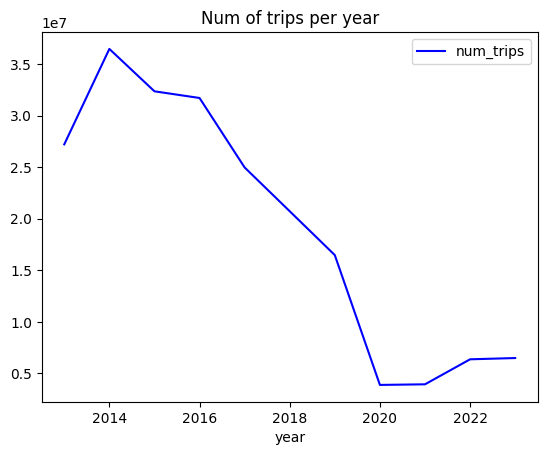

In [18]:
rides_per_year_df.plot(kind='line', color='blue', xlabel="year", title="Num of trips per year")

In [19]:
def fetch_rides_per_month(client, table_id, year, max_bytes_billed=10**10):
    """
    Fetches the number of rides per month for a specific year from the specified BigQuery table.

    Parameters:
    - client: bigquery.Client, the BigQuery client object
    - table_id: str, the fully-qualified table ID (e.g., 'project_id.dataset_id.table_id')
    - year: int, the year for which to fetch the number of rides per month
    - max_bytes_billed: int, the maximum bytes billed for the query (default: 10**10)

    Returns:
    - df: pandas.DataFrame, the DataFrame containing the number of rides per month for the specified year
    """
    # Define the query
    rides_per_month_query = f"""
        WITH period AS 
        (
            SELECT EXTRACT(YEAR FROM trip_start_timestamp) AS year,
                   EXTRACT(MONTH FROM trip_start_timestamp) AS month
            FROM `{table_id}`
        )
        SELECT month, COUNT(1) AS num_trips
        FROM period
        WHERE year = {year}
        GROUP BY month
        ORDER BY month
    """

    # Set up the query configuration to limit the maximum bytes billed
    safe_config = bigquery.QueryJobConfig(maximum_bytes_billed=max_bytes_billed)

    # Run the query
    rides_per_month_query_job = client.query(rides_per_month_query, job_config=safe_config)

    # Convert the query results to a pandas DataFrame
    df = rides_per_month_query_job.to_dataframe()

    return df

In [20]:
# Fetch the number of rides per month for the year 2014
rides_per_month_df = fetch_rides_per_month(client, table_id, 2014)

# View results
print(rides_per_month_df)

    month  num_trips
0       1    2458567
1       2    2509466
2       3    3118544
3       4    3075325
4       5    3477492
5       6    3470917
6       7    3312796
7       8    3395926
8       9    3192619
9      10    3064761
10     11    2627937
11     12    2768150


In [21]:
rides_per_month_df.set_index('month', inplace=True)

<Axes: title={'center': 'Num of trips per month'}, xlabel='month'>

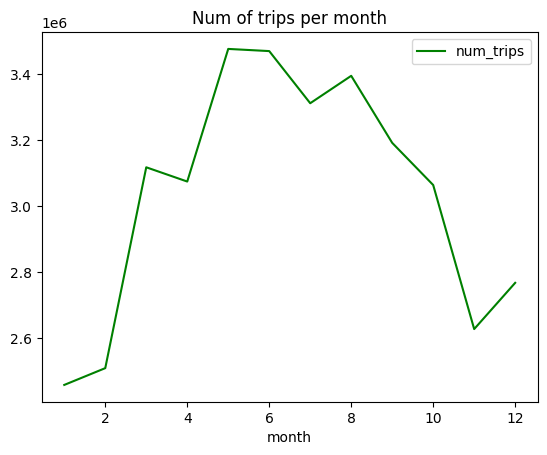

In [22]:
rides_per_month_df.plot(kind='line', color='g', xlabel="month", title="Num of trips per month")

In [23]:
def fetch_trip_time_per_day(client, table_id, start_date, end_date, max_bytes_billed=10**10):
    """
    Fetches total trip time per day for rides within a specified date range from the specified BigQuery table.

    Parameters:
    - client: bigquery.Client, the BigQuery client object
    - table_id: str, the fully-qualified table ID (e.g., 'project_id.dataset_id.table_id')
    - start_date: str, the start date for the date range (inclusive) in 'YYYY-MM-DD' format
    - end_date: str, the end date for the date range (exclusive) in 'YYYY-MM-DD' format
    - max_bytes_billed: int, the maximum bytes billed for the query (default: 10**10)

    Returns:
    - df: pandas.DataFrame, the DataFrame containing the total trip time per day
    """
    # Define the query
    trip_time_per_day_query = f"""
        SELECT EXTRACT(DAY FROM trip_start_timestamp) AS day, SUM(trip_seconds) AS total_trip_seconds
        FROM `{table_id}`
        WHERE trip_start_timestamp >= '{start_date}' 
        AND trip_start_timestamp < '{end_date}' 
        AND trip_seconds > 0
        GROUP BY day
        ORDER BY day
    """

    # Set up the query configuration to limit the maximum bytes billed
    safe_config = bigquery.QueryJobConfig(maximum_bytes_billed=max_bytes_billed)

    # Run the query
    trip_time_per_day_query_job = client.query(trip_time_per_day_query, job_config=safe_config)

    # Convert the query results to a pandas DataFrame
    df = trip_time_per_day_query_job.to_dataframe()

    # Plot the results
    df.set_index('day', inplace=True)
    df.plot(kind='line', color='b', xlabel="Day", ylabel="Total Trip Seconds", title="Total Trip Time per Day")
    plt.show()

    return df

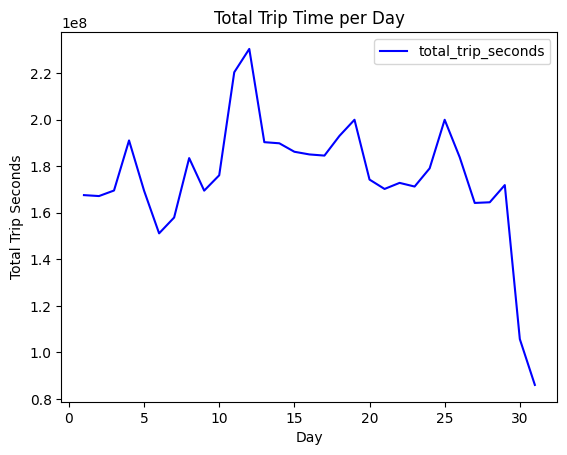

Total trip time per day for Q1 2016:
     total_trip_seconds
day                    
1             167587781
2             167183858
3             169563691
4             191071015
5             169497486
6             151167146
7             157968463
8             183486760
9             169513708
10            176115513
11            220358772
12            230378292
13            190328331
14            189844984
15            186212985
16            185061821
17            184564500
18            193034371
19            199957011
20            174266550
21            170234563
22            172845928
23            171272241
24            179082367
25            199950416
26            183847189
27            164228935
28            164511033
29            171901075
30            105753363
31             86069672


In [24]:
# Fetch and plot total trip time per day for the first quarter of 2016
trip_time_per_day_df_q1 = fetch_trip_time_per_day(client, table_id, '2016-01-01', '2016-04-01')
print("Total trip time per day for Q1 2016:")
print(trip_time_per_day_df_q1)

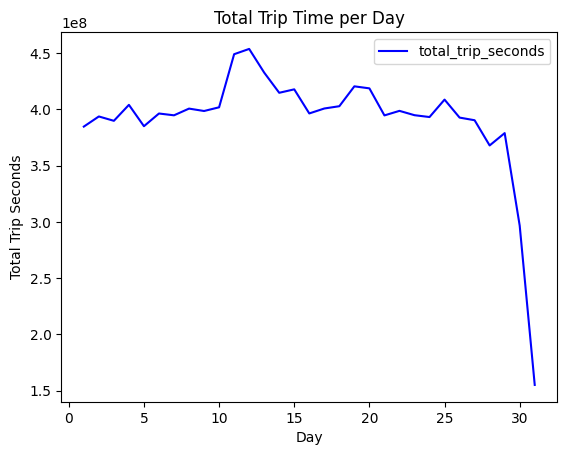

Total trip time per day for H1 2016:
     total_trip_seconds
day                    
1             384718571
2             393728011
3             389863254
4             404061145
5             385069125
6             396357662
7             394754003
8             400722949
9             398586546
10            401880160
11            449094722
12            453798460
13            432740336
14            414784808
15            417847551
16            396418452
17            400816948
18            402846556
19            420528202
20            418727118
21            394671171
22            398717980
23            394857950
24            393216521
25            408723130
26            392725194
27            390370333
28            367948043
29            378930815
30            296610702
31            154976930


In [25]:

# Fetch and plot total trip time per day for the first half of 2016
trip_time_per_day_df_h1 = fetch_trip_time_per_day(client, table_id, '2016-01-01', '2016-07-01')
print("Total trip time per day for H1 2016:")
print(trip_time_per_day_df_h1)

In [26]:
def fetch_speeds(client, table_id, start_date, end_date, max_bytes_billed=10**10):
    """
    Fetches speed data by hour of day for rides within a specified date range from the specified BigQuery table.

    Parameters:
    - client: bigquery.Client, the BigQuery client object
    - table_id: str, the fully-qualified table ID (e.g., 'project_id.dataset_id.table_id')
    - start_date: str, the start date for the date range (inclusive) in 'YYYY-MM-DD' format
    - end_date: str, the end date for the date range (exclusive) in 'YYYY-MM-DD' format
    - max_bytes_billed: int, the maximum bytes billed for the query (default: 10**10)

    Returns:
    - df: pandas.DataFrame, the DataFrame containing the speed data by hour of day
    """
    # Define the query
    speeds_query = f"""
        WITH RelevantRides AS
        (
            SELECT EXTRACT(HOUR FROM trip_start_timestamp) AS hour_of_day,
                   trip_seconds, trip_miles
            FROM `{table_id}`
            WHERE trip_start_timestamp >= '{start_date}' 
            AND trip_start_timestamp < '{end_date}' 
            AND trip_seconds > 0 
            AND trip_miles > 0
        )
        SELECT hour_of_day, COUNT(1) AS num_trips,
               3600 * SUM(trip_miles) / SUM(trip_seconds) AS avg_mph
        FROM RelevantRides
        GROUP BY hour_of_day
        ORDER BY hour_of_day
    """

    # Set up the query configuration to limit the maximum bytes billed
    safe_config = bigquery.QueryJobConfig(maximum_bytes_billed=max_bytes_billed)

    # Run the query
    speeds_query_job = client.query(speeds_query, job_config=safe_config)

    # Convert the query results to a pandas DataFrame
    df = speeds_query_job.to_dataframe()

    return df

In [27]:
# Fetch speed data for the first quarter of 2016
speeds_df_q1 = fetch_speeds(client, table_id, '2016-01-01', '2016-04-01')
print("Speed data for Q1 2016:")
print(speeds_df_q1)

Speed data for Q1 2016:
    hour_of_day  num_trips    avg_mph
0             0     203239  20.178675
1             1     177379  18.624246
2             2     142809  18.449013
3             3     108513  19.285588
4             4      79834  27.625032
5             5      75559  33.092239
6             6     101766  28.567733
7             7     186735  19.891500
8             8     283601  16.795133
9             9     305366  18.465279
10           10     278007  20.130762
11           11     292917  20.944744
12           12     310478  20.073182
13           13     316255  19.779372
14           14     311809  19.319724
15           15     319139  18.523771
16           16     348496  17.172808
17           17     393040  14.652317
18           18     430607  15.396120
19           19     414654  17.820270
20           20     354199  20.372351
21           21     316456  22.613247
22           22     288378  21.143663
23           23     239998  20.274314


In [28]:
# Fetch speed data for the first half of 2016
speeds_df_h1 = fetch_speeds(client, table_id, '2016-01-01', '2016-07-01')
print("Speed data for H1 2016:")
print(speeds_df_h1)

Speed data for H1 2016:
    hour_of_day  num_trips    avg_mph
0             0     439424  21.154839
1             1     369375  20.036526
2             2     294239  19.665822
3             3     218665  21.232245
4             4     165616  29.919257
5             5     157902  34.633080
6             6     212570  29.608059
7             7     382488  21.010362
8             8     579064  18.120629
9             9     631467  19.305506
10           10     587406  21.063620
11           11     629680  21.881689
12           12     671697  20.770346
13           13     673310  20.235233
14           14     662338  19.658958
15           15     679207  18.695309
16           16     730744  17.152907
17           17     803150  14.870544
18           18     871003  15.502090
19           19     839937  18.206197
20           20     722866  20.949023
21           21     663966  23.000148
22           22     622722  21.686705
23           23     528873  21.066419


<Axes: title={'center': 'Number of Trips by Hour of Day'}, xlabel='hour_of_day', ylabel='num_trips'>

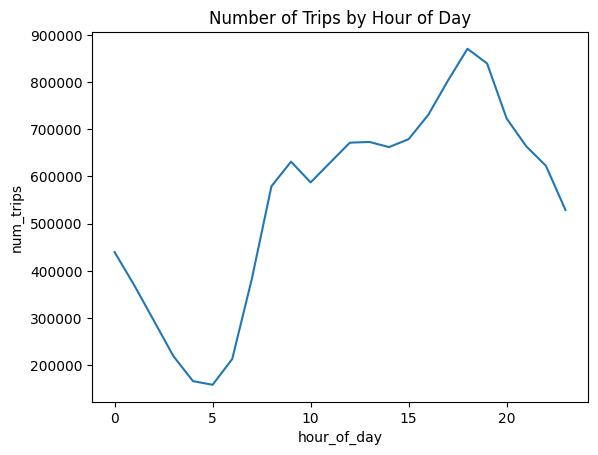

In [29]:
speeds_df_h1['num_trips'].plot(kind='line', xlabel='hour_of_day', ylabel='num_trips', title='Number of Trips by Hour of Day')

<Axes: title={'center': 'Avg MPH by Hour of Day'}, xlabel='hour_of_day', ylabel='avg_mph'>

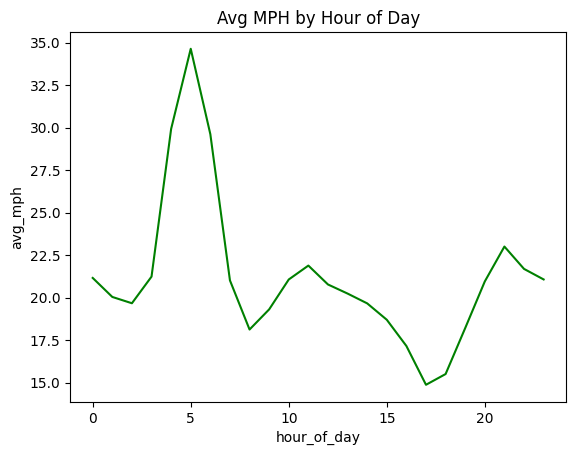

In [30]:
speeds_df_h1['avg_mph'].plot(kind='line', color='g', xlabel='hour_of_day', ylabel='avg_mph', title='Avg MPH by Hour of Day')

**Acknowledgment:**

This analysis builds upon foundational concepts introduced in the "Intro to SQL" tutorial. The tutorial provided valuable insights into SQL queries and data handling techniques, which were instrumental in shaping the approach used in this project.